<a href="https://colab.research.google.com/github/realover82/AINFT-Lab/blob/master/220616%EA%B0%90%EC%9E%90_ver9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [47]:
cd 

/root


In [48]:
cd ..

/


In [49]:
cd /content/drive/MyDrive/deeplearning

/content/drive/MyDrive/deeplearning


In [34]:
import numpy as np  
import datetime
import tensorflow as tf
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.layers import  Flatten, Dense, Dropout
from tensorflow.keras import Model
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [35]:
BATCH_SIZE = 32
COLOR_MODE = 'rgb'
TARGET_SIZE = (255, 255)
GRAY_SCALL = (3,)
INPUT_SIZE = TARGET_SIZE + GRAY_SCALL

def my_model():
  vgg19_model = VGG19(weights='imagenet',include_top=False,input_shape=INPUT_SIZE)
  vgg19_model.trainable = False
  flatten =Flatten()(vgg19_model.layers[-1].output)
  fc1 = Dense(units=4096, activation ='relu')(flatten)
  dropout = Dropout(0.2)(fc1)
  fc2 = Dense(units=1024,activation='relu')(dropout)
  output = Dense(2, activation='softmax')(fc2)
  model = Model(inputs = vgg19_model.input, outputs=output)
  model.summary()
  return model

In [36]:
model = my_model()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 255, 255, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 255, 255, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 255, 255, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 127, 127, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 127, 127, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 127, 127, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 63, 63, 128)       0   

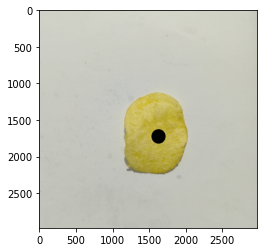

In [37]:
img = tf.io.read_file("IMG_20210318_232548-defect.jpg")
tensor = tf.io.decode_image(img, channels=3, dtype=tf.dtypes.float32)
plt.imshow(tensor)

In [38]:
model = tf.keras.models.load_model('my_model-p4-8.h5')

In [100]:

img = tf.keras.preprocessing.image.load_img("IMG_20210318_232548.jpg", target_size=(255,255,3))
img = np.asarray(img)
img = np.expand_dims(img, axis=0)
output = model.predict(img)
print(output)
# print(CLASSES)
print(classes)
print(classes[output[0]!=0])


[[9.999989e-01 1.092035e-06]]
['Defective' 'Non-Defective']
['Defective' 'Non-Defective']


In [102]:
import numpy
# print(classes[output.index[0]])

# print(output.index(max(output)))
maxindex = numpy.argmax(output)
print(output)
print(maxindex)

[[9.999989e-01 1.092035e-06]]
0


In [113]:

img = tf.keras.preprocessing.image.load_img("IMG_20210318_232548-defect.jpg", target_size=(255,255,3))
img = np.asarray(img)
img = np.expand_dims(img, axis=0)
output = model.predict(img)
print(output)
# print(CLASSES)
print(classes)
print(classes[output[0]!=0])

[[1. 0.]]
['Defective' 'Non-Defective']
['Defective']


In [107]:

img = tf.keras.preprocessing.image.load_img("Pepsico RnD Potato Lab Dataset/Test/Not Defective/IMG_20210318_231802.jpg", target_size=(255,255,3))
img = np.asarray(img)
img = np.expand_dims(img, axis=0)
output = model.predict(img)
print(output)
# print(CLASSES)
print(classes)
print(classes[output[0]!=0])

[[6.8677664e-13 1.0000000e+00]]
['Defective' 'Non-Defective']
['Defective' 'Non-Defective']


In [106]:
import numpy
# print(classes[output.index[0]])

# print(output.index(max(output)))
maxindex = numpy.argmax(output)
print(output)
print(maxindex)

[[1. 0.]]
0


아래는 연습

In [43]:
CLASSES = ['Defective','Non-Defective']
img_path = "IMG_20210318_232548-defect.jpg"
import numpy as np
import matplotlib.pyplot as plt
# Pre-Processing test data same as train data.
#img_width=256
#img_height=256
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
from keras.preprocessing import image
def prepare(img_path):
    img = image.load_img(img_path, target_size=(299,299))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)

result = model.predict([prepare(img_path)])
d=image.load_img(img_path)
plt.imshow(d)
x=np.argmax(result,axis=1)
print (CLASSES[int(x)])

ValueError: ignored

In [70]:
def defective_or_not(img_path):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(255,255,3))
    img = np.asarray(img)
    img = np.expand_dims(img, axis=0)
    # model = tf.keras.models.load_model('my_model-p4-6.h5')
    output = model.predict(img)
    print(classes[output[0]==1])

In [71]:
defective_or_not("IMG_20210318_232548.jpg")

[]


In [51]:
# -- Global Variables -- 
TRAIN_PATH = 'Pepsico RnD Potato Lab Dataset/Train'
TEST_PATH = 'Pepsico RnD Potato Lab Dataset/Test'
BATCH_SIZE = 32
COLOR_MODE = 'rgb'
TARGET_SIZE = (255, 255)
GRAY_SCALL = (3,)
INPUT_SIZE = TARGET_SIZE + GRAY_SCALL
EPOCHS = 2
CLASSES = ['Defective','Non-Defective']

In [53]:
cd 

/root


In [56]:
cd ..

/


In [57]:
cd content/drive/MyDrive/deeplearning

/content/drive/MyDrive/deeplearning


In [62]:
# -- Data Normalization --
data_generator = ImageDataGenerator(samplewise_center=True, #making sure that each image has a mean of 0
                                    samplewise_std_normalization=True, #and standard deviation 1
                                    horizontal_flip=True, #Randomly flip inputs horizontally
                                    validation_split=0.3,
                                    )

In [63]:
# -- Data iterators -- 
train_data = data_generator.flow_from_directory(directory=TRAIN_PATH,
                                                target_size=TARGET_SIZE,
                                                batch_size=BATCH_SIZE,
                                                class_mode='categorical',
                                                color_mode=COLOR_MODE,
                                                subset='training',
                                                shuffle=True)         
    
validation_data = data_generator.flow_from_directory(directory=TRAIN_PATH,
                                                     target_size=TARGET_SIZE,
                                                     batch_size=BATCH_SIZE,
                                                     class_mode='categorical',
                                                     color_mode=COLOR_MODE,
                                                     subset='validation',
                                                     shuffle=True)             

test_data = data_generator.flow_from_directory(directory=TEST_PATH,
                                               target_size=TARGET_SIZE,
                                               batch_size=BATCH_SIZE,
                                               class_mode='categorical',
                                               color_mode=COLOR_MODE,
                                               shuffle=True)

Found 539 images belonging to 2 classes.
Found 230 images belonging to 2 classes.
Found 192 images belonging to 2 classes.


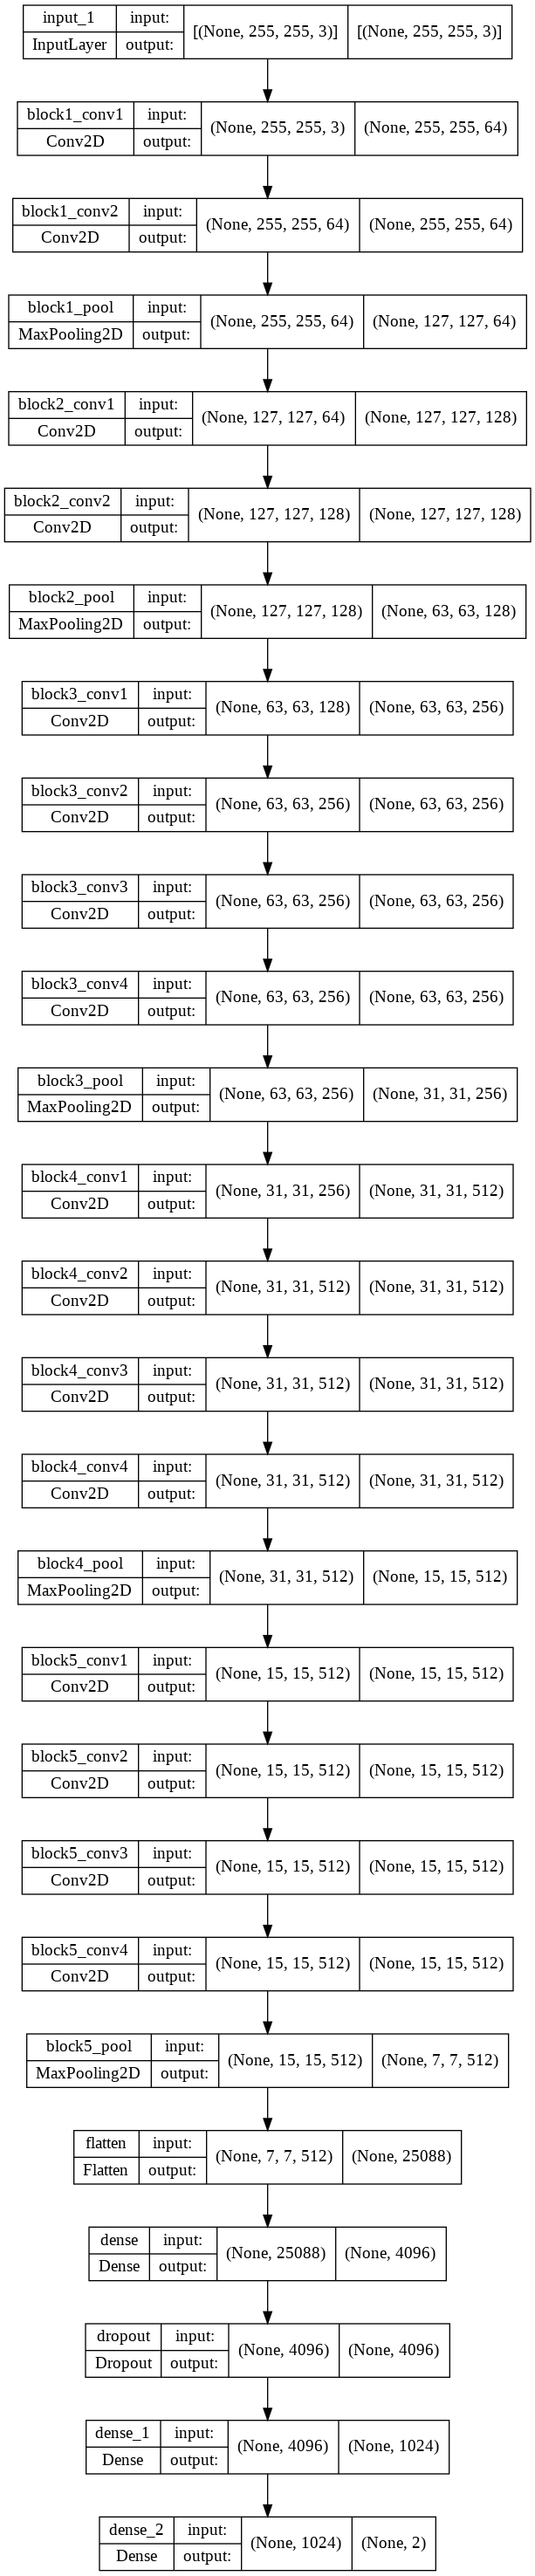

In [67]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=True, show_dtype=False,
    show_layer_names=True, rankdir='T', expand_nested=False, dpi=96
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

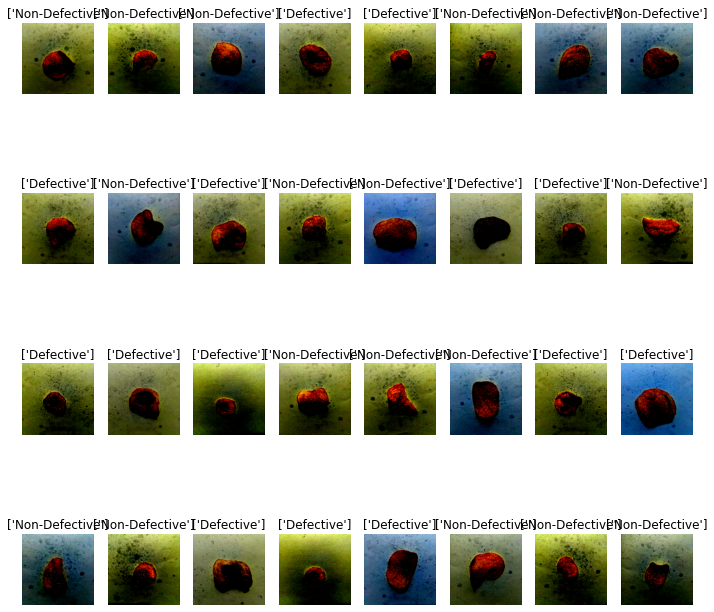

In [64]:
# -- plot random batch -- 
images, labels = train_data.next()
classes = np.asarray(CLASSES)

_, axs = plt.subplots(4, 8, figsize=(12,12))
axs = axs.flatten()
for img, label, ax in zip(images, labels, axs):
    ax.imshow(img)
    ax.axis('off')
    label = label.astype(int)
    ax.set_title(classes[label == 1])
plt.show()

이후는 테스트

In [24]:
img = tf.keras.preprocessing.image.load_img("IMG_20210318_232548.jpg", target_size=(255,255,3))
img = np.asarray(img)
img = np.expand_dims(img, axis=0)
output = model.predict(img)
print(output)

[[9.999989e-01 1.092035e-06]]


In [ ]:
print(CLASSES[])

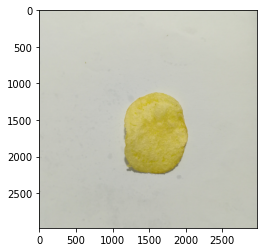

In [13]:
img = tf.io.read_file("IMG_20210318_232548.jpg")
tensor = tf.io.decode_image(img, channels=3, dtype=tf.dtypes.float32)
plt.imshow(tensor)

In [29]:
# classes = ['Defective','Non-Defective']
CLASSES = ['Defective','Non-Defective']
img = tf.keras.preprocessing.image.load_img("IMG_20210318_232548-defect.jpg", target_size=(255,255,3))
img = np.asarray(img)
img = np.expand_dims(img, axis=0)
output = model.predict(img)
print(output)
# print(CLASSES[])
print(CLASSES[output[0]==1])

[[1. 0.]]


TypeError: ignored

In [28]:
CLASSES = ['Defective','Non-Defective']
img = tf.keras.preprocessing.image.load_img("IMG_20210318_232548.jpg", target_size=(255,255,3))
img = np.asarray(img)
img = np.expand_dims(img, axis=0)
output = model.predict(img)
print(output)
print(CLASSES[output[0]==1])

[[9.999989e-01 1.092035e-06]]


TypeError: ignored

In [25]:
print(CLASSES[output[0]])

TypeError: ignored

In [ ]:
CLASSES = ['Defective','Non-Defective']

tensor = tf.image.resize(tensor, [255, 255])
tensor = tensor / 255.0
input_tensor = tf.expand_dims(tensor, axis=0)

logit = model(input_tensor)
pred = tf.math.argmax(logit, axis=1, output_type=tf.dtypes.int64)

print(CLASSES[pred[0]])
print(pred)
print(logit)
# print(tensor)
# print(input_tensor)

Non-Defective
tf.Tensor([1], shape=(1,), dtype=int64)
tf.Tensor([[0.24890615 0.7510938 ]], shape=(1, 2), dtype=float32)


In [ ]:
# classes = ['Defective','Non-Defective']
img = tf.keras.preprocessing.image.load_img("IMG_20210318_232548.jpg", target_size=(255,255,3))
img = np.asarray(img)
img = np.expand_dims(img, axis=0)
output = model.predict(img)
output = tf.math.argmax(output , axis=1, output_type=tf.dtypes.int64)
print(CLASSES[output[0]])

print(output)
# print(CLASSES[output[0]==1])

Defective
tf.Tensor([0], shape=(1,), dtype=int64)


In [ ]:
# classes = ['Defective','Non-Defective']
img = tf.keras.preprocessing.image.load_img("IMG_20210318_232548.jpg", target_size=(255,255,3))
img = np.asarray(img)
img = np.expand_dims(img, axis=0)
# output = model.predict(img)
output = tf.math.argmax(output , axis=1, output_type=tf.dtypes.int64)
print(CLASSES[output[0]])

print(output)
# print(CLASSES[output[0]==1])

Defective
tf.Tensor([0], shape=(1,), dtype=int64)


In [ ]:
CLASSES = ['Defective','Non-Defective']

tensor = tf.image.resize(tensor, [255, 255])
tensor = tensor / 255.0
input_tensor = tf.expand_dims(tensor, axis=0)

logit = model(input_tensor)
pred = tf.math.argmax(logit, axis=1, output_type=tf.dtypes.int64)

print(CLASSES[pred[0]])
print(pred)
print(logit)
# print(tensor)
# print(input_tensor)

Non-Defective
tf.Tensor([1], shape=(1,), dtype=int64)
tf.Tensor([[0.24890615 0.7510938 ]], shape=(1, 2), dtype=float32)


In [ ]:
    img = tf.keras.preprocessing.image.load_img("IMG_20210318_232548.jpg", target_size=(255,255,3))
    img = np.asarray(img)
    img = np.expand_dims(img, axis=0)
    output = model.predict(img)

In [ ]:
img = tf.keras.preprocessing.image.load_img("IMG_20210318_232548.jpg", target_size=(255,255,3))
img = np.asarray(img)
img = np.expand_dims(img, axis=0)
output = model.predict(img)
print(output)

[[9.9999893e-01 1.0920006e-06]]


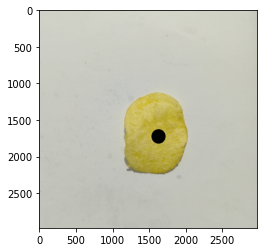

In [ ]:
img = tf.io.read_file("IMG_20210318_232548-defect.jpg")
tensor = tf.io.decode_image(img, channels=3, dtype=tf.dtypes.float32)
plt.imshow(tensor)

In [ ]:
CLASSES = ['Defective','Non-Defective']

tensor = tf.image.resize(tensor, [255, 255])
tensor = tensor / 255.0
input_tensor = tf.expand_dims(tensor, axis=0)

logit = model(input_tensor)
pred = tf.math.argmax(logit, axis=1, output_type=tf.dtypes.int64)

print(CLASSES[pred[0]])
print(pred)
print(logit)
# print(tensor)
# print(input_tensor)

Non-Defective
tf.Tensor([1], shape=(1,), dtype=int64)
tf.Tensor([[0.24876893 0.7512311 ]], shape=(1, 2), dtype=float32)


In [ ]:
# classes = ['Defective','Non-Defective']
img = tf.keras.preprocessing.image.load_img("IMG_20210318_232548-defect.jpg", target_size=(255,255,3))
img = np.asarray(img)
img = np.expand_dims(img, axis=0)
output = model.predict(img)
output = tf.math.argmax(output , axis=1, output_type=tf.dtypes.int64)
print(CLASSES[output[0]])

print(output)
# print(CLASSES[output[0]==1])

In [ ]:
# classes = ['Defective','Non-Defective']
img = tf.keras.preprocessing.image.load_img("IMG_20210318_232548-defect.jpg", target_size=(255,255,3))
img = np.asarray(img)
img = np.expand_dims(img, axis=0)
output = model.predict(img)
print(output)
print(CLASSES[output[0]==1])

[[1. 0.]]


TypeError: ignored

In [ ]:
# classes = ['Defective','Non-Defective']
img = tf.keras.preprocessing.image.load_img("Pepsico RnD Potato Lab Dataset/Test/Defective/IMG_20210319_004811.jpg", target_size=(255,255,3))
img = np.asarray(img)
img = np.expand_dims(img, axis=0)
output = model.predict(img)
print(output)
print(CLASSES[output[0]==1])
# Pepsico RnD Potato Lab Dataset/Test/Defective/IMG_20210319_004811.jpg

[[1. 0.]]


TypeError: ignored